# Simple model

**Model setup:**
- Agents $j\in\{w,m\}$ have earnings $y_{j}$ in their home location 
- Draw a potential migration opportunity to new location 
- Earnings at new location are $y_{j}'$
- Migration is a binary choice $r_j \in \{0,1\}$
- Migration requires a cost $\pi$ 
- $R_j \in (-\infty,+\infty)$ is the net return to migration: $y_{j}'-y_{j}-\pi$ 

- ``Efficient" migration is when $r_j^{\star}=\mathbf{1}(R_j>0)$ \\
(single without children)



**Migration problem of couple:**
$$
max_{r \in \{0,1\},c_w\geq 0,c_m \geq 0} \,\,\,\,\, (c_w-v_w)(c_m-v_m)\\
s.t. \,\,\,\,\, c_w+c_m \leq (1+\alpha) (y_{A}+y_{B}+r\cdot(R_w+R_m))
$$

Outside options are $v_j=v_j(y_{j})$ 
for $j \in \{w,m\}$

**Migration problem of divorcees with children: Full custody to mother**

- $\delta$: utility of being close to a child with custody
- $\lambda$: share of time chhild is with mother

Assume

- Child follows custodial parent.
- Custodial parent decides first. (not important currently)


First, custodial parent solves: $r_w^{\star}=\arg \max_{r_{w}}  y_w + R_w r_w + \lambda \cdot \delta$

Then, non-custodial parent solves:
$$
\begin{align*}
r_m^{\star}(r_w^{\star}) &= \arg \max_{r_{m}}
\begin{cases}\begin{array}{ll}
y_m + R_m\cdot r_m + (1-\lambda)\delta\cdot r_m  & \text{if }r_{w}^{\star}=1\\
y_m + R_m\cdot r_m + (1-\lambda)\delta\cdot(1-r_m)\cdot  & \text{if }r_{w}^{\star}=0
\end{array}\end{cases}
\end{align*}
$$

**Migration problem of divorcees with children: Joint custody**


Assume
- Simultaneous choice of both parents
- Child stays at origin, if only on parent moves (default status quo legal preference)


Parent $w$ solves (symmetric for parent m):
$$
\begin{align*}
r_w^{\star}(r_m) &= \arg \max_{r_{w}}
\begin{cases}\begin{array}{ll}
y_w + R_w\cdot r_w + \lambda\delta   & \text{if }r_{m}=1\\
y_w + R_w\cdot r_w + \lambda\delta\cdot(1-r_w)  & \text{if }r_{m}=0
\end{array}\end{cases}
\end{align*}
$$

The optimal solution is then
$$
\begin{align*}
r_{j}^{\star}(r_{-j}^{\star}) & =\begin{cases}
\begin{array}{ll}
\boldsymbol{1}(R_{j}>0) & \text{if }r_{-j}^{\star}=1\\
\boldsymbol{1}(R_{j}>\lambda_j\delta) & \text{if }r_{-j}^{\star}=0
\end{array}\end{cases}
\end{align*}
$$
where $\lambda_w=\lambda$ and $\lambda_m=1-\lambda$.

## Load packages

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup and solve model

In [19]:
from Model import ModelClass
model = ModelClass() 

%time model.solve() # all loops -> could be much faster

Wall time: 1.96 s


In [21]:
model.sol.move_sole_m[0]

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

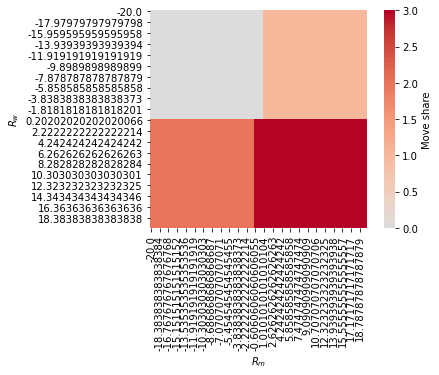

In [46]:
import seaborn as sns
import pandas as pd

i_share = 5
combined = model.sol.move_sole_m[i_share] + 2*model.sol.move_sole_w[i_share]

df = pd.DataFrame()
df['combined'] = combined.ravel()
df['grid_Rw'] = model.par.grid_Rw.ravel()
df['grid_Rm'] = model.par.grid_Rm.ravel()
df = df.pivot(index="grid_Rw", columns="grid_Rm", values="combined")

ax = sns.heatmap(df, cmap='coolwarm', center=0, square=True, cbar_kws={'label': 'Move share'});
ax.set(xlabel='$R_m$',ylabel='$R_w$');
# TODO: rotate and prettify